In [1]:
# Generic libraries
# Reference  - https://www.youtube.com/watch?v=BJ6kyj-st9k

import pandas as pd
import numpy  as np


# Plotting
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 5]

In [2]:
filtered_df = pd.read_pickle('ec2_allprobes.pickle')
normalised_df = pd.read_pickle('normalised_df.pickle')
probes_df = pd.read_pickle('allprobes.pickle')
df = pd.read_pickle('df_timeseries.pickle')
df2 = df.copy()


In [3]:
def add_distance(df):
    
    server_distance = []
    for value in df["nprb_id"]:
        if value == 'es1':
            server_distance.append(probes_df['Distance'][0])
        if value == 'es2':
            server_distance.append(probes_df['Distance'][1])
        if value == 'pt1':
            server_distance.append(probes_df['Distance'][2])
        if value == 'pt2':
            server_distance.append(probes_df['Distance'][3])
        if value == 'es3':
            server_distance.append(probes_df['Distance'][4])
        if value =='nl1':
            server_distance.append(probes_df['Distance'][5])
        if value == 'nl2':
            normal_prbid.append(probes_df['Distance'][6])
        if value == 'nl3':
            server_distance.append(probes_df['Distance'][7])
        if value == 'es4':
            server_distance.append(probes_df['Distance'][8])
        if value == 'ug1':
            server_distance.append(probes_df['Distance'][9])
        if value == 'us1':
            server_distance.append(probes_df['Distance'][10])
        if value == 'us2':
            server_distance.append(probes_df['Distance'][11])
    return(server_distance)

In [4]:
def add_country(df):
    country = []
    for value in df["nprb_id"]:
        if value == 'es1':
            country.append(probes_df['probe_country'][0])
        if value == 'es2':
            country.append(probes_df['probe_country'][1])
        if value == 'pt1':
            country.append(probes_df['probe_country'][2])
        if value == 'pt2':
            country.append(probes_df['probe_country'][3])
        if value == 'es3':
            country.append(probes_df['probe_country'][4])
        if value =='nl1':
            country.append(probes_df['probe_country'][5])
        if value == 'nl2':
            country.append(probes_df['probe_country'][6])
        if value == 'nl3':
            country.append(probes_df['probe_country'][7])
        if value == 'es4':
            country.append(probes_df['probe_country'][8])
        if value == 'ug1':
            country.append(probes_df['probe_country'][9])
        if value == 'us1':
            country.append(probes_df['probe_country'][10])
        if value == 'us2':
            country.append(probes_df['probe_country'][11])
    return(country)


In [5]:
distance = add_distance(df2)
df2['distance']  = distance 

country  = add_country(df2)
df2['country']  = country

# convert integer IP addresses to strings
df2['src_octets'] = df2['src_addr'].apply(lambda x: str(x))
df2['dst_octets']= df2['dst_addr'].apply(lambda x: str(x))

# split the octets into separate columns
df2[['octet1', 'octet2', 'octet3', 'octet4']] = df2['src_octets'].str.split('.', expand=True)
df2[['octet5', 'octet6', 'octet7', 'octet8']] = df2['dst_octets'].str.split('.', expand=True)

# extract the first two octets into separate columns
df2[['src_octet1','src_octet2']] = df2[['octet1', 'octet2']]
df2[['dst_octet1','dst_octet2']] = df2[['octet5', 'octet6']]

# drop the original octet columns
df2 = df2.drop(['octet1', 'octet2', 'octet3', 'octet4'], axis=1)
df2 = df2.drop(['octet5', 'octet6', 'octet7', 'octet8'], axis=1)

df2.head()

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,nprb_id,new_time,distance,country,src_octets,dst_octets,src_octet1,src_octet2,dst_octet1,dst_octet2
0,5040,2.4.1,14,52.46.72.50,4,52.46.72.50,10.18.246.209,ICMP,234.0,64,...,nl1,2023-01-16 11:14:10,1942.032779,NL,10.18.246.209,52.46.72.50,10,18,52,46
1,5040,2.4.1,20,52.46.72.50,4,52.46.72.50,10.109.0.30,ICMP,233.0,64,...,nl3,2023-01-16 11:15:14,1982.532452,NL,10.109.0.30,52.46.72.50,10,109,52,46
2,5080,2.6.2,96,52.46.72.50,4,52.46.72.50,192.168.250.65,ICMP,233.0,64,...,es3,2023-01-16 11:14:49,2628.232438,ES,192.168.250.65,52.46.72.50,192,168,52,46
3,5080,2.6.2,12,52.46.72.50,4,52.46.72.50,192.168.1.38,ICMP,234.0,64,...,es2,2023-01-16 11:14:50,2717.133387,ES,192.168.1.38,52.46.72.50,192,168,52,46
4,5080,2.6.2,33,52.46.72.50,4,52.46.72.50,192.168.0.101,ICMP,232.0,64,...,ug1,2023-01-16 11:16:45,5333.615966,UG,192.168.0.101,52.46.72.50,192,168,52,46


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree,export_text
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [7]:
# Building the test and train dataframes randomly 
import itertools
import random

set1 = df2['nprb_id'].unique()
set2 = df2['dst_addr'].unique()

# generate all combinations
combinations = list(itertools.product(set1, set2))

# shuffle the list of combinations
random.shuffle(combinations) 

#choose random probe id , server destination pairs 
test_set_indices = random.sample(combinations, 10)

#build the test dataframe
dfs = []
for i,k in test_set_indices:
    temp_df = df2.loc[(df['nprb_id'] == i) & (df2['dst_addr'] == k)]
    
    # Append the piece to the selected data
    dfs.append(temp_df)
    
    
test_df = pd.concat(dfs)

set1 = set(combinations)
set2 = set(test_set_indices)

#use the difference to get the test dataframe 
train_set_indices = set1.difference(set2)
dfs = []
for i,k in train_set_indices:
    
    temp_df = df2.loc[(df['nprb_id'] == i) & (df2['dst_addr'] == k)]
    
    # Append the piece to the selected data
    dfs.append(temp_df)

train_df = pd.concat(dfs)


In [8]:
#normalise the rtt values 
train_mean = train_df['avg'].mean()
train_std = train_df['avg'].std()
test_mean = test_df['avg'].mean()
test_std = test_df['avg'].std()


# normalize the avg column using mean and standard deviation
train_df['normalizzed_avg'] = (train_df['avg'] - train_mean) / train_std
test_df['normalizzed_avg'] = (test_df['avg'] - test_mean) / test_std

# normalize the 'distance' column
ttd_mean = train_df['distance'].mean()
ttd_std = train_df['distance'].std()
td_mean = test_df['distance'].mean()
td_std = test_df['distance'].std()



train_df['normalizzed_distance'] = (train_df['distance'] - ttd_mean) /ttd_std
test_df['normalizzed_distance'] = (test_df['distance'] - td_mean) / td_std

In [9]:
X_train = train_df['normalizzed_distance'].values.reshape(-1,1)
X_test = test_df['normalizzed_distance'].values.reshape(-1,1)
y_train = train_df['normalizzed_avg'].values
y_test = test_df['normalizzed_avg'].values
            
mean_train = y_train.mean()
mean_test = y_test.mean()
            
# create an instance of the regression tree model and set the hyperparameters 
rand_forest = RandomForestRegressor(n_estimators=5)

# fit the model to the training data
rand_forest.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rand_forest.predict(X_test)
mean_pred = y_pred.mean()
print(mean_train,mean_test,mean_pred)

1.2191617986232283e-16 -1.2286041540520465e-16 0.03982661176933494


In [10]:
se = (y_pred - y_test)**2
mse = se.mean()
mse

0.3213075168510862

[Text(0.6607142857142857, 0.9285714285714286, 'normalized_distance <= 1.011\nsquared_error = 1.005\nsamples = 14081\nvalue = -0.001'),
 Text(0.4642857142857143, 0.7857142857142857, 'normalized_distance <= 0.169\nsquared_error = 0.192\nsamples = 11668\nvalue = -0.401'),
 Text(0.2857142857142857, 0.6428571428571429, 'normalized_distance <= -0.897\nsquared_error = 0.057\nsamples = 8859\nvalue = -0.592'),
 Text(0.14285714285714285, 0.5, 'normalized_distance <= -1.252\nsquared_error = 0.018\nsamples = 2457\nvalue = -0.844'),
 Text(0.07142857142857142, 0.35714285714285715, 'squared_error = 0.007\nsamples = 1415\nvalue = -0.923'),
 Text(0.21428571428571427, 0.35714285714285715, 'squared_error = 0.012\nsamples = 1042\nvalue = -0.737'),
 Text(0.42857142857142855, 0.5, 'normalized_distance <= -0.398\nsquared_error = 0.038\nsamples = 6402\nvalue = -0.494'),
 Text(0.35714285714285715, 0.35714285714285715, 'normalized_distance <= -0.465\nsquared_error = 0.021\nsamples = 4630\nvalue = -0.561'),
 Tex

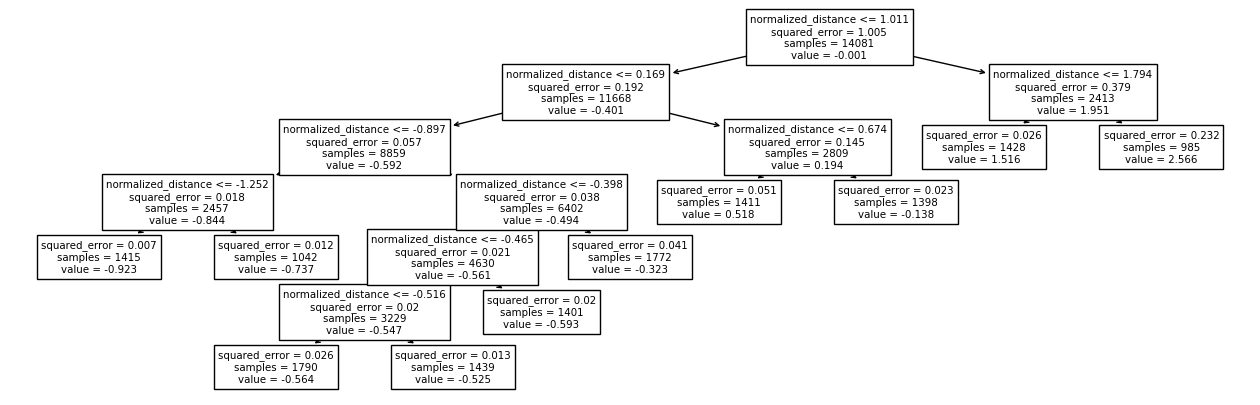

In [11]:
# Plot all decision trees in the random forest
# Plot the first decision tree in the random forest
plot_tree(rand_forest.estimators_[0],feature_names=['normalized_distance'])
